In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [2]:
# Cargar el dataset desde el archivo CSV
path = "dataset/divvy_daily.csv"
df = pd.read_csv(path)

In [3]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
df = df.set_index('date')
arima_df = df['rides']

In [4]:
# Dividir los datos en entrenamiento y prueba
train_size = int(len(arima_df) * 0.8)
train_data, test_data = arima_df.iloc[0:train_size], arima_df.iloc[train_size:]

In [5]:
# Construir y entrenar el modelo ARIMA
model_arima = ARIMA(train_data, order=(5, 1, 0))
model_arima_fit = model_arima.fit()

/home/juanperdomo/forecasting-divvy-bike-rides/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/juanperdomo/forecasting-divvy-bike-rides/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/juanperdomo/forecasting-divvy-bike-rides/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [6]:
# Hacer predicciones
pred_start = len(train_data)
pred_end = len(train_data) + len(test_data) - 1
predictions_arima = model_arima_fit.predict(start=pred_start, end=pred_end, typ='levels')

/home/juanperdomo/forecasting-divvy-bike-rides/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/juanperdomo/forecasting-divvy-bike-rides/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/juanperdomo/forecasting-divvy-bike-rides/venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [7]:
# Calcular MAPE para el conjunto de prueba
mape_arima = mean_absolute_percentage_error(test_data, predictions_arima)
print(f'MAPE ARIMA: {mape_arima:.4f}')

MAPE ARIMA: 0.7411


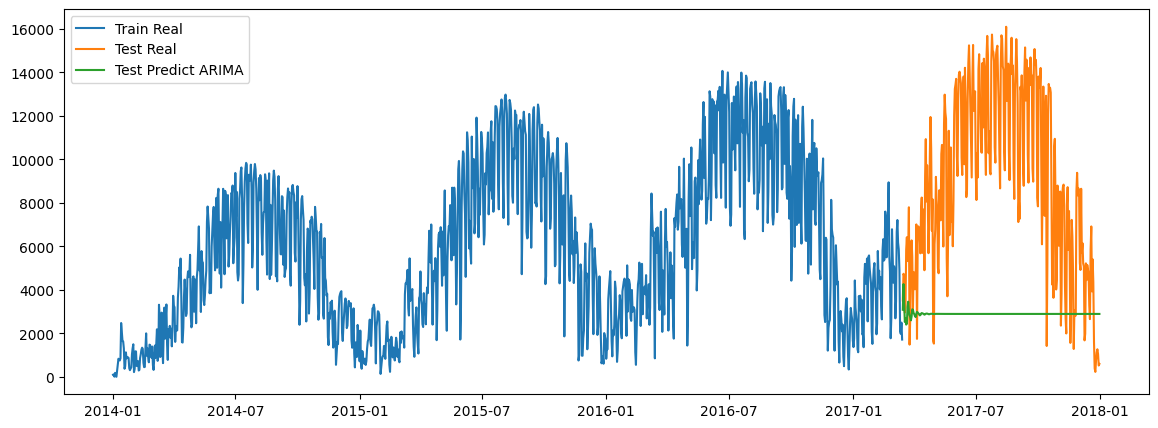

In [8]:
# Visualizar los resultados
plt.figure(figsize=(14, 5))
plt.plot(train_data.index, train_data, label='Train Real')
plt.plot(test_data.index, test_data, label='Test Real')
plt.plot(test_data.index, predictions_arima, label='Test Predict ARIMA')
plt.legend()
plt.show()